# Solutions for block C

In [1]:
import geopandas, osmnx, contextily

- Polygons

**Note** this will probably look slightly different on your computer, based on where you've placed the dataset yourself

In [2]:
p = ("../../../data/Census_Residential_Data_Pack_2011/"\
     "Local_Authority_Districts/"\
     "E08000012/shapefiles/E08000012.shp"
    )
p

'../../../data/Census_Residential_Data_Pack_2011/Local_Authority_Districts/E08000012/shapefiles/E08000012.shp'

In [3]:
liv = geopandas.read_file(p)

- Lines

In [4]:
bikepaths = osmnx.graph_from_place("Liverpool, UK", network_type="bike")

- Points

In [5]:
pubs = osmnx.pois.pois_from_place("Liverpool, UK",
                                  tags={"amenity": "pub"}
                                 )

## Task I

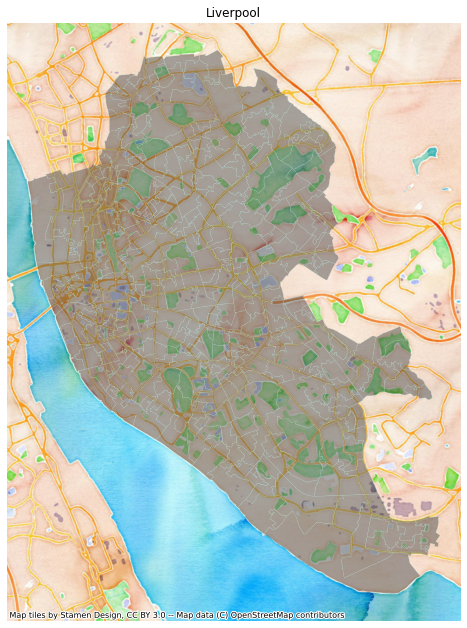

In [6]:
ax = liv.plot(facecolor="#525252",
              edgecolor="#B9EBE3",
              linewidth=0.3,
              alpha=0.5, 
              figsize=(10, 11)
             )
ax.set_title("Liverpool")
ax.set_axis_off()
contextily.add_basemap(ax, 
                       crs=liv.crs,
                       source=contextily.providers.Stamen.Watercolor
                      )

## Task II

- Area

In [7]:
areas = liv.area

- Five smallest can be found by sorting the areas and picking the top of the table

In [8]:
smallest = areas.sort_values().head()
smallest

295    62937.688835
286    74808.839471
296    75800.597457
95     79397.571389
92     86071.394231
dtype: float64

- Multilayer map

<AxesSubplot:>

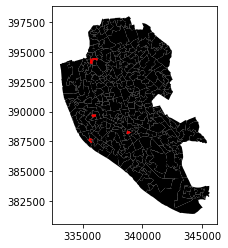

In [9]:
ax = liv.plot(color="k")
liv.reindex(smallest.index)\
   .plot(ax=ax, color="red")

## Task III

- Read data

In [10]:
url = ("https://github.com/geochicasosm/lascallesdelasmujeres"\
       "/raw/master/data/zaragoza/final_tile.geojson")
streets = geopandas.read_file(url).to_crs(epsg=25830)

- Split by gender

In [11]:
men = streets.query("gender == 'Male'")
women = streets.query("gender == 'Female'")

- Calculate lengths (divide by 1,000 so length is in Km)

In [12]:
total_men = men.length.sum() / 1000
total_women = women.length.sum() / 1000

In [13]:
total_men

398.1856550745486

In [14]:
total_women

89.06923496394091